In [1]:
pip install numpy pandas matplotlib seaborn plotly twython wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

data = pd.read_csv("online_review.csv")
print(data.head())

   Unnamed: 0                                       Product_name  \
0           0  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
1           1  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
2           2  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
3           3  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   
4           4  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   

                                              Review  Rating  
0  Best under 60k Great performanceI got it for a...       5  
1                                 Good perfomence...       5  
2  Great performance but usually it has also that...       5  
3           My wife is so happy and best product 👌🏻😘       5  
4  Light weight laptop with new amazing features,...       5  


In [3]:
print(data.isnull().sum())

Unnamed: 0      0
Product_name    0
Review          0
Rating          0
dtype: int64


In [4]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub(r'\[.*?\]', '', text)  # Sửa tại đây
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Sửa tại đây
    text = re.sub(r'<.*?>+', '', text)  # Sửa tại đây
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Sửa tại đây
    text = re.sub(r'\n', '', text)  # Sửa tại đây
    text = re.sub(r'\w*\d\w*', '', text)  # Sửa tại đây
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

data["Review"] = data["Review"].apply(clean)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nguyenkim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
ratings = data["Rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

import plotly.express as px
figure = px.pie(data, 
             values=quantity, 
             names=numbers,hole = 0.5)
figure.show()

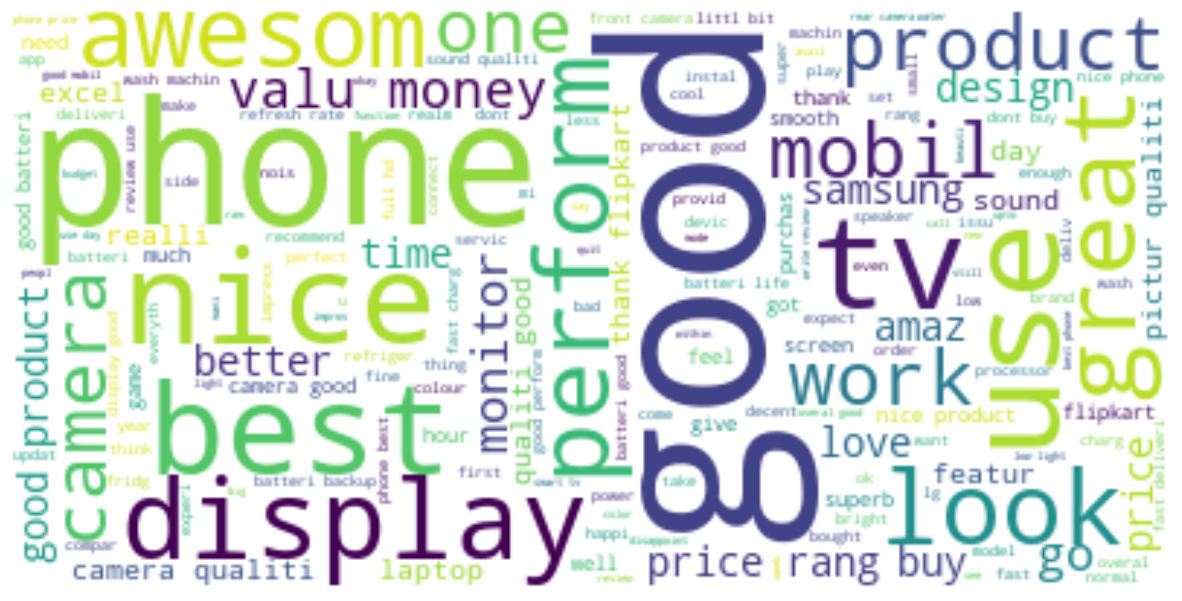

In [6]:
text = " ".join(i for i in data.Review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [7]:
import nltk
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Review"]]
data = data[["Review", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Nguyenkim\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                              Review  Positive  Negative  \
0  best  great performancei got around  backup bi...     0.395     0.101   
1                                        good perfom     0.744     0.000   
2  great perform usual also game laptop issu batt...     0.277     0.000   
3                        wife happi best product 👌🏻😘     0.512     0.000   
4  light weight laptop new amaz featur batteri li...     0.000     0.000   

   Neutral  
0    0.504  
1    0.256  
2    0.723  
3    0.488  
4    1.000  


In [8]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)


Neutral 🙂 


In [9]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  923.553
Negative:  96.775
Neutral:  1283.688


In [10]:
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import re

# Đọc dữ liệu từ file CSV
df = pd.read_csv('online_review.csv')

# Kiểm tra cấu trúc dữ liệu để chắc chắn rằng có cột 'Review' và 'Rating'
print(df.head())

# Tiền xử lý dữ liệu
def clean_text(text):
    text = re.sub(r'\[.*?\]', '', text)  # Xóa các từ trong dấu []
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Xóa URL
    text = re.sub(r'\W', ' ', text)  # Xóa các ký tự đặc biệt
    text = re.sub(r'\s+', ' ', text)  # Xóa khoảng trắng dư thừa
    text = text.lower()  # Chuyển về chữ thường
    return text

df['Cleaned_Review'] = df['Review'].apply(clean_text)

# Khởi tạo bộ phân tích cảm xúc
analyzer = SentimentIntensityAnalyzer()

# Tạo các cột cảm xúc: tích cực, tiêu cực và trung lập
df['positive'] = df['Cleaned_Review'].apply(lambda x: analyzer.polarity_scores(x)['pos'])
df['negative'] = df['Cleaned_Review'].apply(lambda x: analyzer.polarity_scores(x)['neg'])
df['neutral'] = df['Cleaned_Review'].apply(lambda x: analyzer.polarity_scores(x)['neu'])

# Chuyển Rating thành nhãn cảm xúc (Tốt hoặc Cần Cải Tiến)
def label_sentiment(rating):
    if rating > 3:
        return 'Tốt'
    else:
        return 'Cần Cải Tiến'

df['Sentiment_Label'] = df['Rating'].apply(label_sentiment)

# Tách dữ liệu thành X (đặc trưng) và y (nhãn)
X = df[['positive', 'negative', 'neutral']]
y = df['Sentiment_Label']

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

# Giả sử bạn có một phản hồi mới trong file CSV
# Lấy một phản hồi từ file CSV để thử nghiệm
new_review = df['Review'].iloc[0]  # Lấy phản hồi đầu tiên từ file CSV

# Tiền xử lý phản hồi mới
cleaned_review = clean_text(new_review)

# Phân tích cảm xúc
positive_score = analyzer.polarity_scores(cleaned_review)['pos']
negative_score = analyzer.polarity_scores(cleaned_review)['neg']
neutral_score = analyzer.polarity_scores(cleaned_review)['neu']

# Dự đoán cảm xúc và quyết định
new_data = pd.DataFrame([[positive_score, negative_score, neutral_score]], columns=['positive', 'negative', 'neutral'])
decision = model.predict(new_data)

print(f"Phản hồi mới: {new_review}")
print(f"Quyết định: {decision[0]}")


   Unnamed: 0                                       Product_name  \
0           0  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
1           1  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
2           2  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
3           3  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   
4           4  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   

                                              Review  Rating  
0  Best under 60k Great performanceI got it for a...       5  
1                                 Good perfomence...       5  
2  Great performance but usually it has also that...       5  
3           My wife is so happy and best product 👌🏻😘       5  
4  Light weight laptop with new amazing features,...       5  
Accuracy: 0.9370932754880694
              precision    recall  f1-score   support

Cần Cải Tiến       0.83      0.72      0.77        67
         Tốt       0.95      0.97      0.96       394

    accuracy        